# Задание 1 

Сгенерируйте матрицу В размером 3х3 со случайными элементами, равномерно распределенными на интервале от 0 до 1 и найдите её определитель.

In [2]:
### Type your code here
import numpy as np
a=np.random.rand(3,3)
print(a)

det =np.linalg.det(a)
print(det)

[[0.60361508 0.72982202 0.9523608 ]
 [0.46484378 0.04508246 0.27282924]
 [0.47869733 0.63748784 0.54464136]]
0.0820448827171831


# Задание 2

Для двух векторов:
С=$\left( \begin{matrix}
   1  \\
   2.94  \\
   -2.2  \\
   0.1   \\   
\end{matrix} \right)$ и b= {0.6; 3.2; -1.8, 0.05} найти меру косинусного сходства.

In [3]:
### Type your code here
import numpy as np
c=np.array([1,2.94,-2.2,0.1])
b=np.array([0.6,3.2,-1.8,0.05])
a= (c@b)/(np.linalg.norm(c)*np.linalg.norm(b))

print(a)


0.9864935664827553


# Задание 3 

Для заданного ниже объекта s проделайте следующее:

Создайте новый Series, значения которого совпадают со значениями s, а индексы - целочисленные значения от 4 до 15, не включая 15.
Выберите из s только целочисленные элементы и вычислите их дисперсию. (*)

Пояснения:
Дисперсия рассчитывается с помощью функции из библиотеки numpy: np.var( , ddof=0) или встроенной в python функции: .var(ddof=1)

In [4]:
import pandas as pd
import numpy as np
s = pd.Series(data=['1', 5, 3.1, 'hello', -5, -1000, 12.78, 'world', 10.10, '!', 98], 
              index=range(6, 28, 2))
### Type your code here
s1 = pd.Series(data=s.values,index =range(4,15))

mas=[]
for i in s1:
    if type(i) is int:
        mas.append(i)
print(np.var(mas, ddof=0))        

201563.25


### Информация для последующих заданий
- Для всех последующих заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные tr_mcc_codes, tr_types, transactions и gender_train из одноимённых таблиц из папки data. Для таблицы transactions используйте только первые n=1000000 строк. Обратите внимание на разделители внутри каждого из файлов - они могут различаться!

### Описание данных
#### Таблица transactions.csv

Таблица содержит историю транзакций клиентов банка за один год и три месяца.

#### Формат данных

customer_id,tr_datetime,mcc_code,tr_type,amount,term_id

111111,15 01:40:52,1111,1000,-5224,111111

111112,15 15:18:32,3333,2000,-100,11122233

...

#### Описание полей
customer_id — идентификатор клиента;

tr_datetime — день и время совершения транзакции (дни нумеруются с начала данных);

mcc_code — mcc-код транзакции;

tr_type — тип транзакции;

amount — сумма транзакции в условных единицах со знаком; + — начисление средств клиенту (приходная транзакция), - — списание средств (расходная транзакция);

term_id — идентификатор терминала;

### Таблица gender_train.csv

Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

#### Формат данных
customer_id,gender

111111,0

111112,1

...

#### Описание полей
customer_id — идентификатор клиента;

gender — пол клиента;

### Таблица tr_mcc_codes.csv

Данная таблица содержит описание mcc-кодов транзакций.

#### Формат данных
mcc_code;mcc_description

1000;словесное описание mcc-кода 1000

2000;словесное описание mcc-кода 2000

...

#### Описание полей
mcc_code – mcc-код транзакции;

mcc_description — описание mcc-кода транзакции.

### Таблица tr_types.csv

Данная таблица содержит описание типов транзакций.

#### Формат данных
tr_type;tr_description

1000;словесное описание типа транзакции 1000

2000;словесное описание типа транзакции 2000

...

#### Описание полей
tr_type – тип транзакции;

tr_description — описание типа транзакции;

# Задание 4

1. В датафрейме transactions задайте столбец  customer_id в качестве индекса.
2. Выделите клиента с максимальной суммой транзакции (то есть с максимальным приходом на карту). (\*)
3. Найдите у него наиболее часто встречающийся модуль суммы приходов/расходов. (\**)
4. Выделите клиента с минимальной суммой транзакции.



##### Пояснения:
(\*) Если у клиента были транзакции [-10000, 10, 0, -10], то максимумом будет являться значение 10. <br>
(\**) Если у клиента были транзакции [-10000, 10, 0, -10], то наиболее встречающийся модуль суммы транзакций равен 10, и встретился он 2 раза.

In [16]:
### Type your code here
import numpy as np
import pandas as pd

new_file = pd.read_csv(filepath_or_buffer = "transactions.csv", 
                       nrows=10000000,
                       index_col ='customer_id')
#max=new_file.nlargest(1,'amount')
max_sum=new_file['amount'].idxmax()
moda = abs(new_file.loc[max_sum].amount.mode())
min_sum =new_file['amount'].idxmin()



print("Max sum",max_sum)
print("Moda",moda)
print("Min sum",min_sum)

Max sum 26782922
Moda 0    22459.16
Name: amount, dtype: float64
Min sum 26782922


# Задание 5

Соедините transactions со всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [22]:
### Type your code here
### Type your code here
import numpy as np
import pandas as pd

tr = pd.read_csv(filepath_or_buffer = "transactions.csv",nrows=1000000)

tr_mcc_codes= pd.read_csv(filepath_or_buffer = "tr_mcc_codes.csv",sep=";")

tr_types=pd.read_csv(filepath_or_buffer = "tr_types.csv",sep=";") 
gender_train=pd.read_csv(filepath_or_buffer = "gender_train.csv",sep=",") 

data =pd.merge(tr,gender_train,on ='customer_id', how="left")
res1 = pd.merge(data,tr_mcc_codes, on='mcc_code',how='inner')
res2 = pd.merge(res1,tr_types, on='tr_type',how='inner')
#print("tr,gender_train",data)
#print("tr, tr_mcc_codes",res1)
res2


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ


# Задание 6

1. Определите модуль разницы между медианными тратами женщин и мужчин (трата - отрицательное значение amount). 



##### Пояснения:


(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

In [1]:
### Type your code here
### Type your code here
import numpy as np
import pandas as pd

tr = pd.read_csv(filepath_or_buffer = "transactions.csv",nrows=1000000)
gender_train=pd.read_csv(filepath_or_buffer = "gender_train.csv",sep=",") 

data =pd.merge(tr,gender_train, how="left")
med_1=abs(data[(data.gender==1)&(data.amount<0)][['amount']].median())
med_2=abs(data[(data.gender==0)&(data.amount<0)][['amount']].median())
#sum = data.loc[max_sum].amount.median()
print("med_1",med_1)
print("med_2",med_2)
razn = abs(med_1-med_2)
print("razn" , razn)
data

med_1 amount    11229.58
dtype: float64
med_2 amount    9769.73
dtype: float64
razn amount    1459.85
dtype: float64


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1.0
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1.0
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1.0
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,1.0
...,...,...,...,...,...,...,...
999995,98801178,269 10:29:06,5921,1010,-23016.59,127873,0.0
999996,98801178,270 10:26:45,5211,1010,-61380.88,10114209,0.0
999997,98801178,270 15:18:53,5921,1010,-11800.27,10105341,0.0
999998,98801178,271 12:47:13,5211,1010,-16170.59,10114209,0.0


# Задание 7

1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можно использовать строковые методы для датафрейма - .str.split(), например. 
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.<br>
Снять ограничение на количество выводимых строк можно с помощью:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(a)

In [17]:
### Type your code here
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
tr = pd.read_csv(filepath_or_buffer = "transactions.csv",nrows=1000000)

tr_mcc_codes= pd.read_csv(filepath_or_buffer = "tr_mcc_codes.csv",sep=";")

tr_types=pd.read_csv(filepath_or_buffer = "tr_types.csv",sep=";") 
gender_train=pd.read_csv(filepath_or_buffer = "gender_train.csv",sep=",") 

data =pd.merge(tr,gender_train,on ='customer_id', how="left")
res1 = pd.merge(data,tr_mcc_codes, on='mcc_code',how='inner')
res2 = pd.merge(res1,tr_types, on='tr_type',how='inner')

# merged.head()
res2["tr_day"] = res2["tr_datetime"].apply(lambda date: date.split()[0])
# merged = merged.rename(columns={"tr_datetime": "tr_day"})

# оставляем только те дни, у которых число mcc кодов > 75
groups = res2.groupby("tr_day")["mcc_code"].nunique()
groups = groups[groups > 75].reset_index() # нужно удалить индекс, иначе не заработает
res2[res2["tr_day"].isin(groups["tr_day"])].head()

# 5611;Мужская одежда и аксессуары, включая одежду для мальчиков
# 5621;Готовая женская одежда
# 5631;Аксессуары для женщин
# 5977;Магазины косметики
# 7230;Салоты красоты и парикмахерские
# 5921;Магазины с продажей спиртных напитков на вынос (пиво, вино и ликер)

groups_mcc_gender = res2.groupby(["mcc_code", "gender"])
counted = groups_mcc_gender.count()
# 0 - женщины, 1 - мужчины
print("women men")
for mcc_code in (5611, 5621, 5631, 5977, 7230, 5921):
    print(counted.loc[mcc_code, 0][0], counted.loc[mcc_code, 1][0])
print()


medians = groups_mcc_gender.median(numeric_only=True)

# 5992;Флористика
print(abs(medians["amount"].loc[5992, 1]) > abs(medians["amount"].loc[5992, 0]))

# 6211;Ценные бумаги: брокеры/дилеры
print(abs(medians["amount"].loc[6211, 0]) > abs(medians["amount"].loc[6211, 1]))

# 5813;Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков
print(abs(medians["amount"].loc[5813, 0]) < abs(medians["amount"].loc[5813, 1]))
medians

# Верные ответы: 1, 3, 5

women men
68 93
575 113
202 50
2066 808
322 87
1476 2848

True
False
True


C:\Users\s0169465\AppData\Local\Temp\ipykernel_7688\1990313364.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(counted.loc[mcc_code, 0][0], counted.loc[mcc_code, 1][0])


customer_id  tr_type      amount
mcc_code gender                                  
742      0.0      60737861.0   1110.0  -19202.580
         1.0      46884459.0   1110.0  -36268.285
1711     0.0      24784802.0   1110.0 -674897.690
         1.0      76758933.0   1110.0  -16844.370
1731     1.0      57546321.0   1010.0  -55024.940
...                      ...      ...         ...
9311     0.0      52462561.0   1100.0  -10460.800
         1.0      49662300.0   1100.0  -11229.580
9399     0.0      52847004.0   1100.0  -14936.240
         1.0      55893207.0   1100.0  -11903.350
9402     1.0      13025490.0   1110.0   -4581.670

[349 rows x 3 columns]

# Задание 8

1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в созданную функцию plot_pivot_table.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
     1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
     2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
     3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
     4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
     5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

0         -2245.92
1         -5614.79
2         -1122.96
3         -2245.92
4         -2245.92
            ...   
999562    -3571.01
999563     -718.69
999564   -35575.31
999565   -72385.87
999566    -4491.83
Name: amount, Length: 768645, dtype: float64
True
False
True


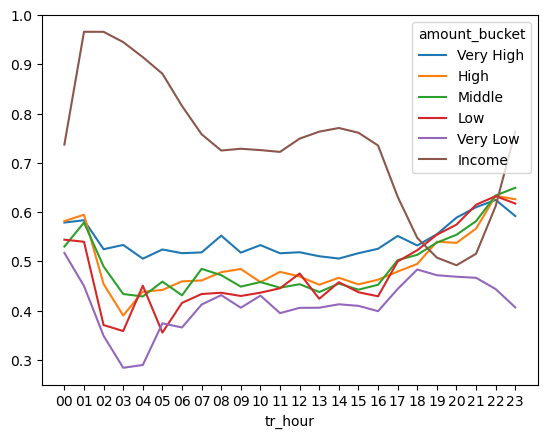

In [8]:
### Type your code here
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
tr = pd.read_csv(filepath_or_buffer = "transactions.csv",nrows=1000000)

tr_mcc_codes= pd.read_csv(filepath_or_buffer = "tr_mcc_codes.csv",sep=";")

tr_types=pd.read_csv(filepath_or_buffer = "tr_types.csv",sep=";") 
gender_train=pd.read_csv(filepath_or_buffer = "gender_train.csv",sep=",") 

data =pd.merge(tr,gender_train,on ='customer_id', how="left")
res1 = pd.merge(data,tr_mcc_codes, on='mcc_code',how='inner')
res2 = pd.merge(res1,tr_types, on='tr_type',how='inner')

# merged.head()
print(res2[res2["amount"] < 0]["amount"])
res2["amount_bucket"] = pd.qcut(res2[res2["amount"] < 0]["amount"], 5, labels=['Very High', 'High', 'Middle', 'Low', 'Very Low'])

res2["amount_bucket"] = res2["amount_bucket"].cat.add_categories("Income").fillna("Income")
res2

res2["tr_hour"] = res2["tr_datetime"].apply(lambda date: date.split()[1].split(":")[0])
res2

def plot_pivot_table(pivot_table):
    plot = pivot_table.plot()
    plot.set_xticks(range(len(pivot_table.index)))
    plot.set_xticklabels(pivot_table.index.values)

res2

pivot_table = pd.pivot_table(res2, values="gender", index="tr_hour", columns="amount_bucket")
plot_pivot_table(pivot_table)

# по умолчанию считает среднее арифметическое. в данном случае можно интерпретировать как процент мужчин
pivot_table

#  1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
#  2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
#  3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
#  4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
#  5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

#  1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
print(pivot_table.iloc[1:6].mean()["Income"] > 0.85)

#  2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
print(pivot_table.mean()["Income"] < 0.5)

#  3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
print(pivot_table.loc['03']["Very Low"] < 0.3)

#  4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
# Ответ: нет, см. фиолетовую кривую. не >80%, но есть особый период от 3х до 4х часов ночи

#  5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.
# Ответ: да. кривая Very High (голубая) выше 0.5


## Задание 9
Считайте данные из файла 'winemag-data-130k-v2.csv'. 
а) Постройте точечный график (Scatter plot), по оси х отложите points, а по y - price.
б) Постройте график Barplot количества вин по странам.

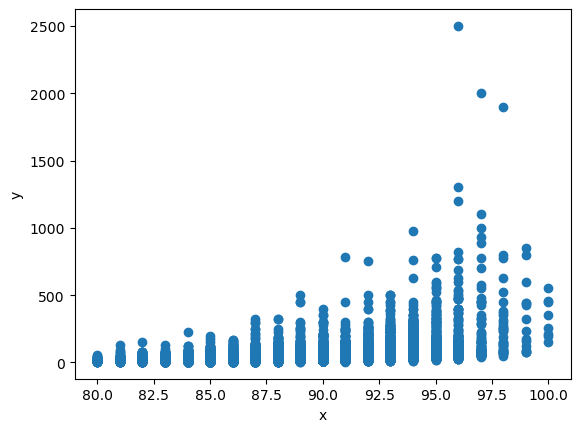

<Axes: ylabel='country'>

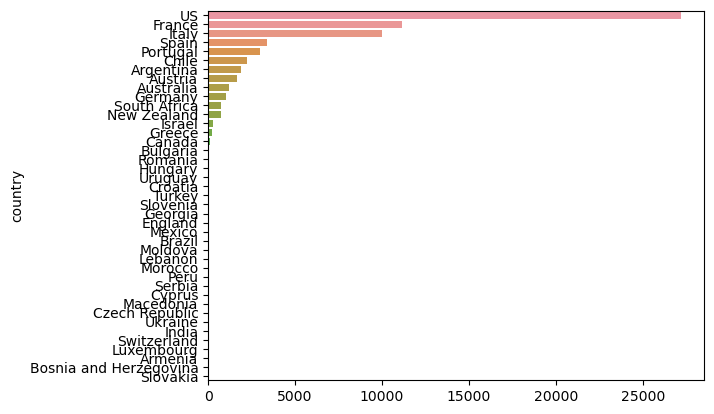

In [14]:
### Type your code here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
tr = pd.read_csv(filepath_or_buffer = "winemag-data-130k-v2.csv",)
plt.xlabel('x'), plt.ylabel('y')
plt.scatter( tr.points,tr.price)

plt.show() 

bar = pd.read_csv(filepath_or_buffer = "winemag-data-130k-v2.csv",)

vin = bar['country'].value_counts()
###sns.xlabel('Cтрана')
###sns.ylabel('Количество вин')
sns.barplot(x=vin.values, y=vin.index, data=bar)
